In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('COVID19INDIA_CAPSTPROJECT.csv')

C:\Users\singhegm\Anaconda3\Anaconda1\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


# Data Analysis:

In [4]:
# lets drop the first column that is not needed-

data = df.iloc[:, 1:]  # iloc[not any Rows to be dropped, 1st column only to be dropped]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
468823,-2,16/04/2020,NaN,NaN,NaN,NaN,Maharashtra,Hospitalized,16,4,2020
468824,1,18/04/2020,NaN,NaN,NaN,Nagpur,Maharashtra,Hospitalized,18,4,2020
468825,-1,18/04/2020,NaN,NaN,NaN,NaN,Maharashtra,Hospitalized,18,4,2020
468826,10,19/04/2020,NaN,NaN,NaN,Nagpur,Maharashtra,Hospitalized,19,4,2020


In [5]:
# Inspect the data before Analysis-

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468828 entries, 0 to 468827
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Num Cases          468828 non-null  int64 
 1   Date Announced     468828 non-null  object
 2   Age Bracket        45090 non-null   object
 3   Gender             101142 non-null  object
 4   Detected City      58482 non-null   object
 5   Detected District  404406 non-null  object
 6   Detected State     468801 non-null  object
 7   Current Status     468828 non-null  object
 8   Day                468828 non-null  int64 
 9   Month              468828 non-null  int64 
 10  Year               468828 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 39.3+ MB


In [6]:
# now lets check Null values in each column-

data.isnull().sum().sort_values(ascending = False)

Age Bracket          423738
Detected City        410346
Gender               367686
Detected District     64422
Detected State           27
Year                      0
Month                     0
Day                       0
Current Status            0
Date Announced            0
Num Cases                 0
dtype: int64

In [7]:
# to check how much %ge of data is missing in each column 

data.isnull().sum().sort_values(ascending = False)/len(data) * 100

Age Bracket          90.382400
Detected City        87.525916
Gender               78.426630
Detected District    13.741073
Detected State        0.005759
Year                  0.000000
Month                 0.000000
Day                   0.000000
Current Status        0.000000
Date Announced        0.000000
Num Cases             0.000000
dtype: float64

In [8]:
# we can also sum up the total Num of cases Month-wise:

data.groupby('Month')['Num Cases'].sum()

Month
1        27
2        54
3     44064
4    423117
Name: Num Cases, dtype: int64

In [9]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated'], dtype=object)

In [10]:
# now lets see the total number of patients were hospitalized Month-wise:

data['Current Status'] == 'Hospitalized'

0         False
1         False
2         False
3         False
4         False
          ...  
468823     True
468824     True
468825     True
468826     True
468827     True
Name: Current Status, Length: 468828, dtype: bool

In [11]:
hosp = data[data['Current Status'] == 'Hospitalized'].groupby('Month')['Num Cases'].sum()
hosp

Month
3     38637
4    422469
Name: Num Cases, dtype: int64

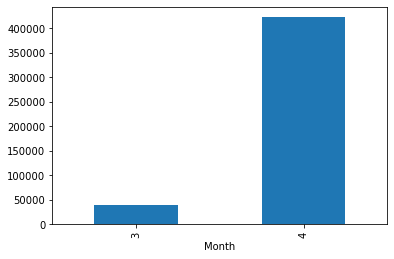

In [12]:
hosp.plot.bar()
plt.show()

In [13]:
# now lets check affected cases based on gender or acc to data which gender group is affected more and might have more chances:

gend = data.groupby('Gender')['Num Cases'].sum()
gend

Gender
F    33021
M    68121
Name: Num Cases, dtype: int64

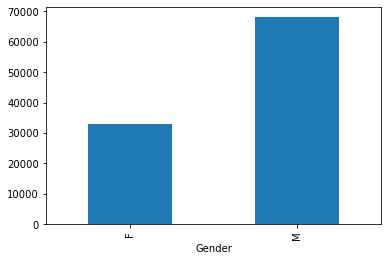

In [14]:
gend.plot.bar()
plt.show()

In [15]:
# |||ly let us now check which age-group is the most affected:

age = data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending = False)
age

Age Bracket
35      1796
32      1393
40      1314
55      1205
50      1175
        ... 
76.0       1
73.0       1
70.0       1
44.0       1
72.0       1
Name: Num Cases, Length: 161, dtype: int64

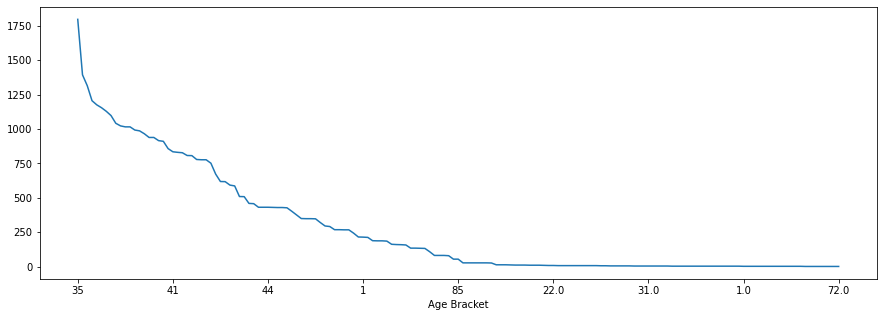

In [16]:
age.plot(kind = 'line', figsize = (15, 5))
plt.show()

In [17]:
Top10_age = data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending = False).head(10)
Top10_age

Age Bracket
35    1796
32    1393
40    1314
55    1205
50    1175
45    1154
21    1128
65    1097
26    1041
27    1022
Name: Num Cases, dtype: int64

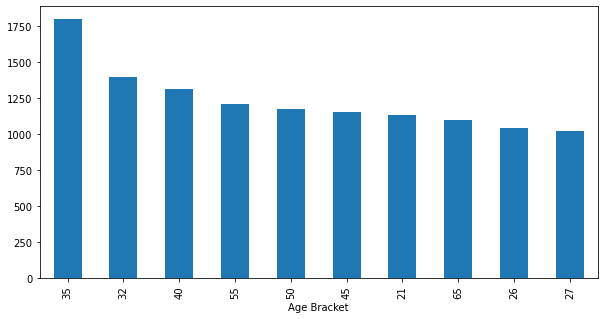

In [18]:
Top10_age.plot.bar(figsize = (10, 5))
plt.show()

In [19]:
data[data['Current Status'] == 'Deceased']['Num Cases'].sum()

1215

In [20]:
# State-wise Deceased cases in India

deceased = data[data['Current Status'] == 'Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending = False)
deceased

Detected State
Maharashtra          297
Karnataka            297
Gujarat              108
West Bengal           81
Kerala                81
Punjab                54
Madhya Pradesh        54
Uttar Pradesh         27
Telangana             27
Tamil Nadu            27
Rajasthan             27
Odisha                27
Jammu and Kashmir     27
Himachal Pradesh      27
Delhi                 27
Bihar                 27
Name: Num Cases, dtype: int64

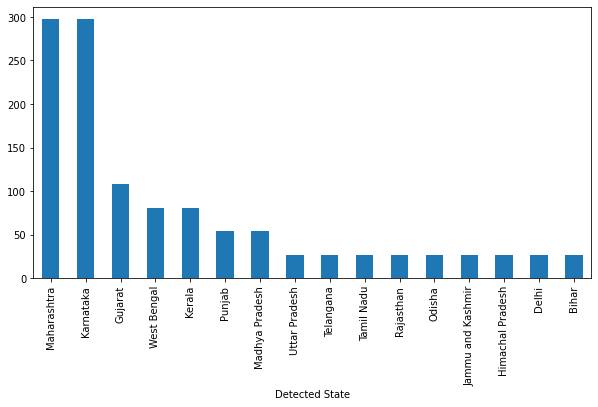

In [21]:
deceased.plot.bar(figsize = (10, 5))
plt.show()

In [22]:
# Cases receorded on daily basis:

daily = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
daily

Num Cases
Month Day           
3     4          135
      5           27
      7           54
      9          108
      10         108
      11         216
      12         108
      13         162
      14         297
      15         216
      16         324
      17         378
      18         594
      19         567
      20        1404
      21        1809
      22        1593
      23        2214
      24        1701
      25        2025
      26        1566
      27        3780
      28        3321
      29        2862
      30        4806
      31        8262
4     1        11421
      2        13095
      3        15012
      4        15552
      5        16362
      6        13095
      7        15390
      8        15201
      9        21924
      10       23490
      11       23031
      12       20466
      13       33561
      14       27837
      15       23868
      16       28647
      17       24894
      18       36990
      19       42633

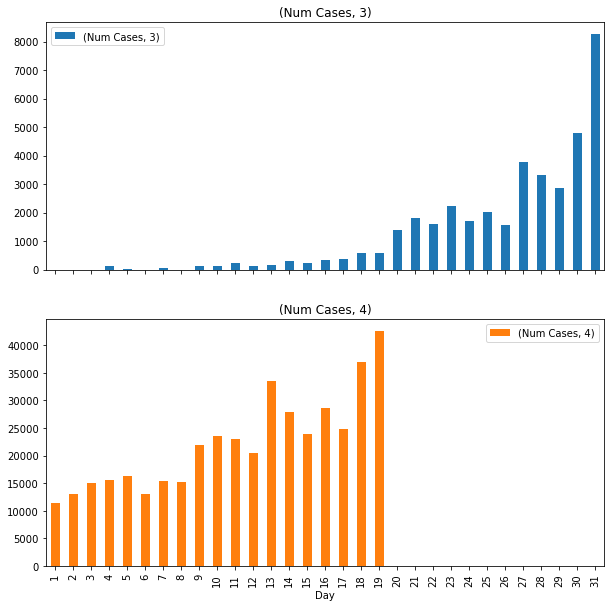

In [23]:
daily.unstack(level = 0).plot(kind = 'bar', subplots = True, figsize = (10, 10))
plt.show()

# Now let us build a Machine Learning Model: -

# 1. Linear Regression Model

In [24]:
total_days = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
total_days

Num Cases
Month Day           
3     4          135
      5           27
      7           54
      9          108
      10         108
      11         216
      12         108
      13         162
      14         297
      15         216
      16         324
      17         378
      18         594
      19         567
      20        1404
      21        1809
      22        1593
      23        2214
      24        1701
      25        2025
      26        1566
      27        3780
      28        3321
      29        2862
      30        4806
      31        8262
4     1        11421
      2        13095
      3        15012
      4        15552
      5        16362
      6        13095
      7        15390
      8        15201
      9        21924
      10       23490
      11       23031
      12       20466
      13       33561
      14       27837
      15       23868
      16       28647
      17       24894
      18       36990
      19       42633

In [25]:
x = np.arange(len(total_days))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [26]:
y = total_days.values
y

array([[  135],
       [   27],
       [   54],
       [  108],
       [  108],
       [  216],
       [  108],
       [  162],
       [  297],
       [  216],
       [  324],
       [  378],
       [  594],
       [  567],
       [ 1404],
       [ 1809],
       [ 1593],
       [ 2214],
       [ 1701],
       [ 2025],
       [ 1566],
       [ 3780],
       [ 3321],
       [ 2862],
       [ 4806],
       [ 8262],
       [11421],
       [13095],
       [15012],
       [15552],
       [16362],
       [13095],
       [15390],
       [15201],
       [21924],
       [23490],
       [23031],
       [20466],
       [33561],
       [27837],
       [23868],
       [28647],
       [24894],
       [36990],
       [42633]], dtype=int64)

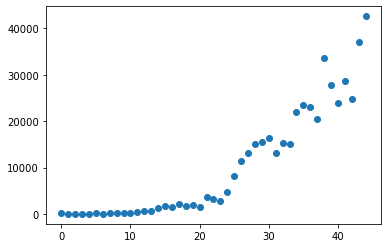

In [27]:
plt.scatter(x, y)
plt.show()

In [28]:
# we will convert x into 2-D array for better accuracy

x = x.reshape(-1, 1)  # -1 -> no of rows be equal to all the values and 1 -> only column needed
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [30]:
# now let's educate our model
# with increase in x-value y should increase linearly
# also calculate other parameters(slope, intercept, etc...)

regressor.fit(x,y)

LinearRegression()

### from .fit func() our model know what is the intercept, slope almost about everything about our data

In [31]:
# now let us check y-value for a particular x-value in our data

y[44]  # at x=44, the y-value in data is 42633

array([42633], dtype=int64)

In [32]:
# now lets try to predict y-value for an unknown x

regressor.predict([[45]])

array([[29049.84545455]])

In [33]:
# here we will store all the machine predicted values in a new variable m/c prediction or Yp

machine_prediction = regressor.predict(x)
machine_prediction

array([[-7738.72173913],
       [-6921.19802372],
       [-6103.6743083 ],
       [-5286.15059289],
       [-4468.62687747],
       [-3651.10316206],
       [-2833.57944664],
       [-2016.05573123],
       [-1198.53201581],
       [ -381.0083004 ],
       [  436.51541502],
       [ 1254.03913043],
       [ 2071.56284585],
       [ 2889.08656126],
       [ 3706.61027668],
       [ 4524.13399209],
       [ 5341.65770751],
       [ 6159.18142292],
       [ 6976.70513834],
       [ 7794.22885375],
       [ 8611.75256917],
       [ 9429.27628458],
       [10246.8       ],
       [11064.32371542],
       [11881.84743083],
       [12699.37114625],
       [13516.89486166],
       [14334.41857708],
       [15151.94229249],
       [15969.46600791],
       [16786.98972332],
       [17604.51343874],
       [18422.03715415],
       [19239.56086957],
       [20057.08458498],
       [20874.6083004 ],
       [21692.13201581],
       [22509.65573123],
       [23327.17944664],
       [24144.70316206],


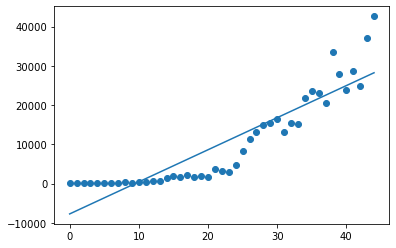

In [34]:
# now we can see the best fit line calculated by our Linear Regression Model

plt.scatter(x, y)
plt.plot(x, machine_prediction)
plt.show()

In [35]:
regressor.intercept_

array([-7738.72173913])

In [36]:
regressor.coef_

array([[817.52371542]])

In [37]:
# accuracy of our model can be checked by checking its score

regressor.score(x, y) * 100  # 82% accuracy found in our model

82.10410012608074

### Conclusion: - We can clearly see that LR model is not the best choice here for making more accurate predictions as we have lot of -ve data loss

### But we can also see that if data is considered after 20days then our Accuracy of the model can be imroved to much better

# 2. Polynomial or Multi - Linear Regression Model

In [38]:
poly = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
poly

Num Cases
Month Day           
3     4          135
      5           27
      7           54
      9          108
      10         108
      11         216
      12         108
      13         162
      14         297
      15         216
      16         324
      17         378
      18         594
      19         567
      20        1404
      21        1809
      22        1593
      23        2214
      24        1701
      25        2025
      26        1566
      27        3780
      28        3321
      29        2862
      30        4806
      31        8262
4     1        11421
      2        13095
      3        15012
      4        15552
      5        16362
      6        13095
      7        15390
      8        15201
      9        21924
      10       23490
      11       23031
      12       20466
      13       33561
      14       27837
      15       23868
      16       28647
      17       24894
      18       36990
      19       42633

In [39]:
X = np.arange(len(poly))
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [40]:
Y = poly.values
Y

array([[  135],
       [   27],
       [   54],
       [  108],
       [  108],
       [  216],
       [  108],
       [  162],
       [  297],
       [  216],
       [  324],
       [  378],
       [  594],
       [  567],
       [ 1404],
       [ 1809],
       [ 1593],
       [ 2214],
       [ 1701],
       [ 2025],
       [ 1566],
       [ 3780],
       [ 3321],
       [ 2862],
       [ 4806],
       [ 8262],
       [11421],
       [13095],
       [15012],
       [15552],
       [16362],
       [13095],
       [15390],
       [15201],
       [21924],
       [23490],
       [23031],
       [20466],
       [33561],
       [27837],
       [23868],
       [28647],
       [24894],
       [36990],
       [42633]], dtype=int64)

In [41]:
X = X.reshape(-1, 1)
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

In [42]:
# but we will import necessary modules to calculate the degree of polynomial

from sklearn.preprocessing import PolynomialFeatures
deg = PolynomialFeatures(degree = 2)

In [43]:
# now lets transform X and Y into Polynomial Regression model

Poly_Regression = deg.fit_transform(X)
Poly_Regression

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.29

In [44]:
# we can check the Polynomial regression model built by converting the model into a dataframe

pd.DataFrame(Poly_Regression)  # here at x= 3, x^0 = 1, x^1=3, x^2=9 => degrees=2 only

,0,1,2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
5,1.0,5.0,25.0
6,1.0,6.0,36.0
7,1.0,7.0,49.0
8,1.0,8.0,64.0
9,1.0,9.0,81.0


In [45]:
from sklearn.linear_model import LinearRegression
Poly_regressor = LinearRegression()

In [46]:
Poly_regressor.fit(Poly_Regression, Y)

LinearRegression()

In [47]:
Poly_regressor.coef_

array([[   0.        , -405.38078731,   27.79328415]])

In [48]:
Poly_regressor.intercept_

array([1025.42719704])

In [49]:
Y[44]

array([42633], dtype=int64)

In [50]:
Poly_regressor.predict([[1, 44, 1936]])

array([[36996.4706753]])

In [51]:
Poly_regressor.predict(deg.transform([[44]]))  # no fit_transform as we are not building a model using it only transform

array([[36996.4706753]])

In [52]:
Poly_regMachine = Poly_regressor.predict(Poly_Regression)
Poly_regMachine

array([[ 1025.42719704],
       [  647.83969389],
       [  325.83875904],
       [   59.4243925 ],
       [ -151.40340574],
       [ -306.64463567],
       [ -406.2992973 ],
       [ -450.36739062],
       [ -438.84891563],
       [ -371.74387234],
       [ -249.05226075],
       [  -70.77408085],
       [  163.09066736],
       [  452.54198387],
       [  797.57986869],
       [ 1198.20432181],
       [ 1654.41534324],
       [ 2166.21293298],
       [ 2733.59709102],
       [ 3356.56781736],
       [ 4035.12511202],
       [ 4769.26897497],
       [ 5558.99940623],
       [ 6404.3164058 ],
       [ 7305.21997368],
       [ 8261.71010985],
       [ 9273.78681434],
       [10341.45008713],
       [11464.69992822],
       [12643.53633762],
       [13877.95931533],
       [15167.96886134],
       [16513.56497566],
       [17914.74765828],
       [19371.51690921],
       [20883.87272845],
       [22451.81511599],
       [24075.34407183],
       [25754.45959598],
       [27489.16168844],


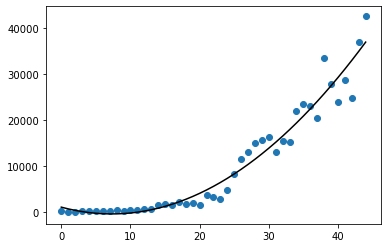

In [53]:
plt.scatter(x, y)
plt.plot(x, Poly_regMachine, color = 'k')
plt.show()

In [54]:
Poly_regressor.predict(deg.transform([[48]]))

array([[45602.87609429]])

In [55]:
Poly_regressor.score(Poly_Regression, Y) * 100

94.88963541819963

### This model is giving much better accuracy which can also be increased by increasing the degrees of polynomial for much more accurate Polynomial Regression Model.